In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dfl = pd.read_json("logins.json")

In [6]:
dfl.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [7]:
df = pd.read_json("ultimate_data_challenge.json")

In [8]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
from datetime import datetime

In [17]:
def make_date(t):
    datetime_obj = datetime.strptime(t, '%Y-%m-%d')
    return datetime_obj.date()

In [18]:
df['DATE_last_trip_date'] = df['last_trip_date'].apply(make_date)

In [22]:
df['DATE_last_trip_date'].min(), df['DATE_last_trip_date'].max()

(datetime.date(2014, 1, 1), datetime.date(2014, 7, 1))

In [26]:
df['DATE_last_trip_date'].sort_values()[:15]

31425    2014-01-01
10729    2014-01-01
40336    2014-01-01
34828    2014-01-01
37295    2014-01-01
9941     2014-01-01
13542    2014-01-01
39857    2014-01-01
19976    2014-01-01
48271    2014-01-01
11259    2014-01-01
3112     2014-01-01
9242     2014-01-01
33809    2014-01-01
15256    2014-01-01
Name: DATE_last_trip_date, dtype: object

We have not been provided any unique IDs. We will assume that each row refers to a unique user.

Let us see what fraction of the users have taken a trip in the last 30 days. We are assuming that the data as collected on 2014-07-01.

In [35]:
(df['last_trip_date'] >= '2014-06-01').value_counts()

False    31196
True     18804
Name: last_trip_date, dtype: int64

18804/50000 = 37.61

Thus, about 37.6% of the users have been retained. This is slightly more than 1/3 of the total number of users.

In [36]:
df['retained'] = (df['last_trip_date'] >= '2014-06-01')
df['retained'].value_counts()

False    31196
True     18804
Name: retained, dtype: int64

Let us see how retained varies by features.

In [38]:
dfy = df[df['retained'] == True]
dfn = df[df['retained'] == False]

In [39]:
dfy['avg_rating_by_driver'].mean(), dfn['avg_rating_by_driver'].mean()

(4.762771739130456, 4.787464148754435)

Both retained and non-retained drivers have similar average rating

In [41]:
dfy['avg_rating_of_driver'].mean(), dfn['avg_rating_of_driver'].mean()

(4.592930351735465, 4.607556868776835)

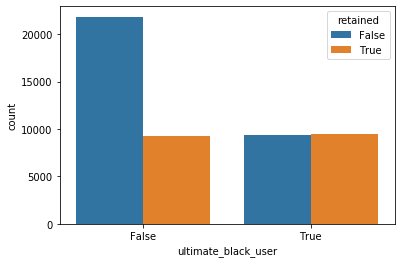

In [49]:
sns.countplot(df['ultimate_black_user'], hue=df['retained'])

It appears, more than 50% of 'ultimate black' users are retained.

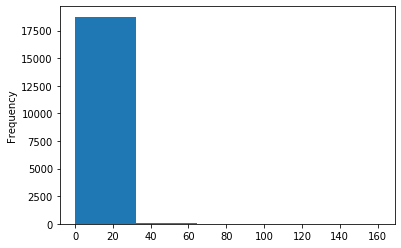

In [51]:
dfy['avg_dist'].plot(kind = 'hist', bins = 5)

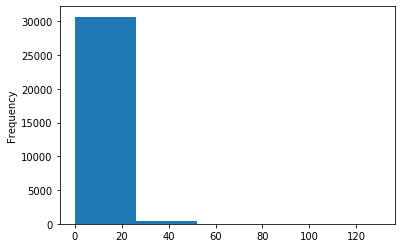

In [53]:
dfn['avg_dist'].plot(kind = 'hist', bins = 5)

In [54]:
dfy['city'].value_counts()

Winterfell        8213
King's Landing    6363
Astapor           4228
Name: city, dtype: int64

In [55]:
dfn['city'].value_counts()

Winterfell        15123
Astapor           12306
King's Landing     3767
Name: city, dtype: int64

Eyeballing the data seems to show that riders of Winterfell and Astapor are being much less retained.

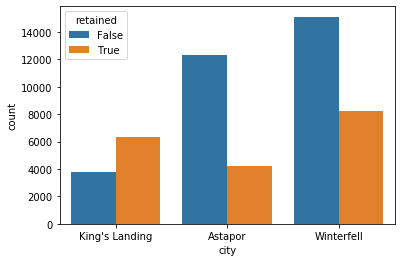

In [56]:
sns.countplot(df['city'], hue=df['retained'])

In [59]:
dfy['trips_in_first_30_days'].mean(), dfn['trips_in_first_30_days'].mean()

(3.3063178047223993, 1.6584818566482882)

Interesting observation - retained riders are active on "Ultimate" since the beginning. The have a much higher number of average trips in the first 30 days.

In [60]:
dfy['avg_surge'].mean(), dfn['avg_surge'].mean()

(1.073809295894508, 1.075339146044379)

In [61]:
dfy['surge_pct'].mean(), dfn['surge_pct'].mean()

(9.152797277175118, 8.666739325554499)

In [62]:
dfy['weekday_pct'].mean(), dfn['weekday_pct'].mean()

(61.3890342480323, 60.64703167072686)

In [64]:
df = df.drop('DATE_last_trip_date', axis=1)
df.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False


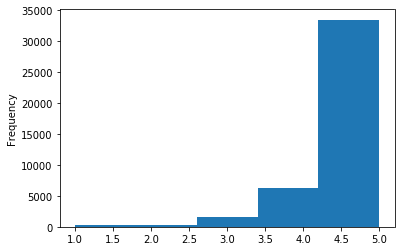

In [70]:
df['avg_rating_of_driver'].plot(kind='hist', bins = 5)

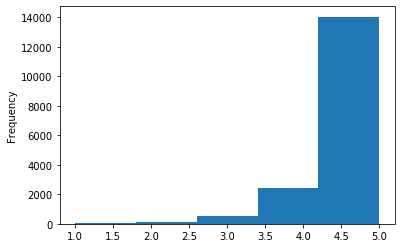

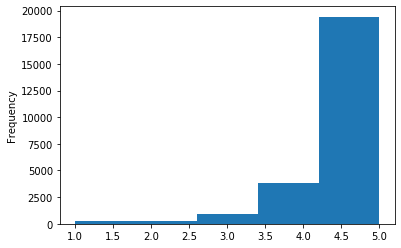

In [71]:
dfy['avg_rating_of_driver'].plot(kind='hist', bins = 5)
plt.show()
dfn['avg_rating_of_driver'].plot(kind='hist', bins = 5)
plt.show()

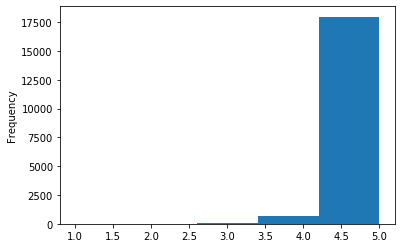

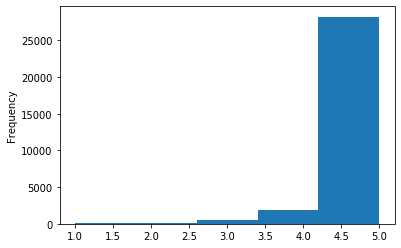

In [72]:
dfy['avg_rating_by_driver'].plot(kind='hist', bins = 5)
plt.show()
dfn['avg_rating_by_driver'].plot(kind='hist', bins = 5)
plt.show()

'avg_rating_by_driver' and 'avg_rating_of_driver' columns don't seem to differentiate between retained and non-retained users. So, let us drop them.

In [74]:
df = df.drop(['avg_rating_by_driver', 'avg_rating_of_driver'], axis=1)

In [82]:
df = df.drop(['signup_date', 'last_trip_date'], axis=1)

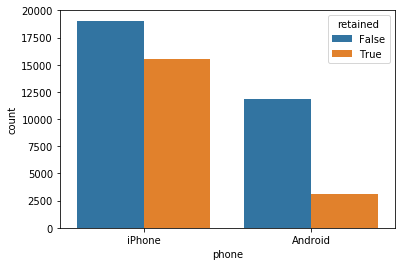

In [75]:
sns.countplot(df['phone'], hue=df['retained'])

iPhone users tend to be retained more.

In [77]:
df.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
retained                    0
dtype: int64

In [78]:
df = df.dropna(subset = ['phone'])
df.shape

(49604, 11)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   avg_surge               49604 non-null  float64
 3   phone                   49604 non-null  object 
 4   surge_pct               49604 non-null  float64
 5   ultimate_black_user     49604 non-null  bool   
 6   weekday_pct             49604 non-null  float64
 7   avg_dist                49604 non-null  float64
 8   retained                49604 non-null  bool   
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [95]:
numerical = ['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist']

In [97]:
dfnum = df[numerical]
retained = df['retained']
dfcat = df.drop(numerical, axis = 1)
dfcat = dfcat.drop('retained', axis=1)

In [96]:
df.columns, dfnum.columns, dfcat.columns

(Index(['city', 'trips_in_first_30_days', 'avg_surge', 'phone', 'surge_pct',
        'ultimate_black_user', 'weekday_pct', 'avg_dist', 'retained'],
       dtype='object'),
 Index(['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct',
        'avg_dist', 'retained'],
       dtype='object'),
 Index(['city', 'phone', 'ultimate_black_user'], dtype='object'))

In [103]:
dfnum = pd.DataFrame(Normalizer().fit_transform(dfnum.values), columns = dfnum.columns)

In [104]:
dfnum.head()

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist
0,0.081611,0.022443,0.314202,0.942606,0.074878
1,0.000000,0.019729,0.000000,0.986436,0.162959
2,0.029984,0.009995,0.000000,0.999471,0.007696
3,0.108443,0.013736,0.240984,0.963935,0.028436
4,0.165727,0.014087,0.139684,0.975424,0.037052


In [105]:
dfcat = pd.get_dummies(dfcat, drop_first = True)
dfcat.head(3)

,ultimate_black_user,city_King's Landing,city_Winterfell,phone_iPhone
0,True,1,0,1
1,False,0,0,0
2,False,0,0,1


In [117]:
dfconcat = pd.concat([dfnum.reset_index(drop=True), dfcat.reset_index(drop=True)], axis=1)
dfconcat.head()

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist,ultimate_black_user,city_King's Landing,city_Winterfell,phone_iPhone
0,0.081611,0.022443,0.314202,0.942606,0.074878,True,1,0,1
1,0.000000,0.019729,0.000000,0.986436,0.162959,False,0,0,0
2,0.029984,0.009995,0.000000,0.999471,0.007696,False,0,0,1
3,0.108443,0.013736,0.240984,0.963935,0.028436,True,1,0,1
4,0.165727,0.014087,0.139684,0.975424,0.037052,False,0,1,0


In [118]:
retained.shape, dfnum.shape, dfcat.shape, dfconcat.shape

((49604,), (49604, 5), (49604, 4), (49604, 9))

In [122]:
X = dfconcat.values
y = retained.values
X.shape, y.shape

((49604, 9), (49604,))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [136]:
def fit_predict_score(clf, X_train, y_train, X_test, y_test):
# method to fit on the training set, predict on train and test set and find the metrics

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_train_pred = clf.predict(X_train)
  
  # training performance
  print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
  print("Training recall: ", recall_score(y_train, y_train_pred))
  print("Training precision: ", precision_score(y_train, y_train_pred))
  print(confusion_matrix(y_train, y_train_pred))
  
  # validation performance
  print("Validation accuracy: ", accuracy_score(y_test, y_pred))
  print("Validation recall: ", recall_score(y_test, y_pred))
  print("Validation precision: ", precision_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  y_prob = clf.predict_proba(X_test)[:, 1]
#   plot_curves(y_test, y_prob)

def predict_score(clf, X_test, y_test):
# method to predict on train and test set and find the metrics

  y_pred = clf.predict(X_test)
  
  # validation performance
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("recall: ", recall_score(y_test, y_pred))
  print("precision: ", precision_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  y_prob = clf.predict_proba(X_test)[:, 1]
#   plot_curves(y_test, y_prob)

In [135]:
lr_model = LogisticRegression()

In [137]:
fit_predict_score(lr_model, X_train, y_train, X_test, y_test)

Training accuracy:  0.7154701005468337
Training recall:  0.5310662747194014
Training precision:  0.6504377710498322
[[20443  4272]
 [ 7019  7949]]
Validation accuracy:  0.7162584416893458
Validation recall:  0.5284904131785039
Validation precision:  0.6467283542630535
[[5149 1069]
 [1746 1957]]


In [138]:
lr_model.coef_[0]

array([1.55975237, 1.32176622, 2.57872235, 3.26166516, 1.85832069,
       0.87460415, 1.64814966, 0.57158977, 1.06232312])

In [140]:
coef = pd.DataFrame(lr_model.coef_[0], index=dfconcat.columns, columns = ["Coefficient"])
sort_coef = coef.sort_values("Coefficient", ascending=False)
sort_coef

,Coefficient
weekday_pct,3.261665
surge_pct,2.578722
avg_dist,1.858321
city_King's Landing,1.648150
trips_in_first_30_days,1.559752
avg_surge,1.321766
phone_iPhone,1.062323
ultimate_black_user,0.874604
city_Winterfell,0.571590


Above table gives the relative importance of variables in predicting retention.

Thus we see:
- Weekday percentage is important in predicting retention
- surge percentage and average distance are important
- iphone users are retained more
- people who take more trips in first 30 days have a higher chance of being retained.
- Riders of King's Landing are retianed more

Thus, Ultimate Inc should:
- give more discounts to riders of King's Landing
- give priority services to riders who are active on weekdays
- give offers to riders to take above a given number of trips in the first 30 days.